Dataset shape: (150, 4)
Decision Tree Performance:
Accuracy: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Random Forest Performance:
Accuracy: 0.9000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Model Comparison:
Best Decision Tree Accuracy: 0.9333
Best Random Forest Accuracy: 0.9000


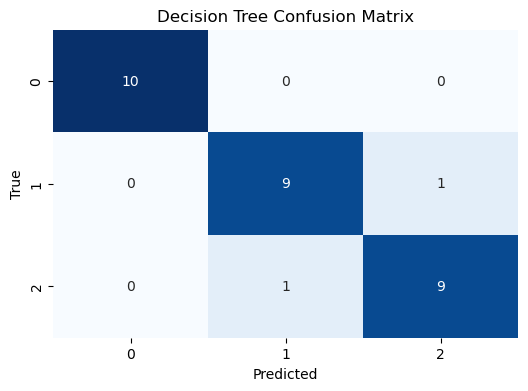

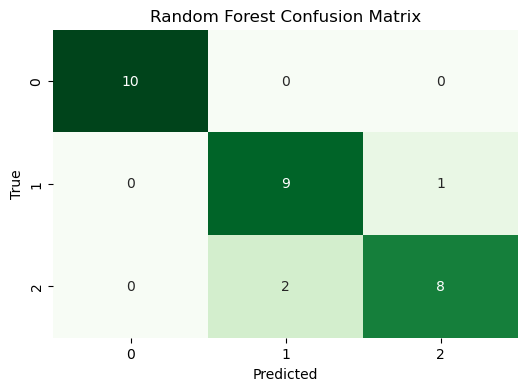

In [13]:
# Jeffery Dirden 
# W214801986
# ITAI 1371
# Module 2 Real World and Application of Supervised Learning


# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris  # Load the iris dataset
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation metrics

# Load the Iris dataset
data = load_iris()  # Fetch the iris dataset from scikit-learn
X = pd.DataFrame(data.data, columns=data.feature_names)  # Create a DataFrame for the features
y = pd.Series(data.target)  # Create a Series for the target variable (species)

# Problem Statement: Predicting the species of iris flowers based on their features
# Data Preprocessing
print(f"Dataset shape: {X.shape}")  # Print the shape of the dataset (number of samples and features)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures that the split maintains the same distribution of classes in both sets

# Standardize the features for scaling
scaler = StandardScaler()  # Instantiate a StandardScaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit to the training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform the test data based on the training data's scaling

# ---- Model Training: Decision Tree ----
dt = DecisionTreeClassifier(random_state=42)  # Instantiate a Decision Tree Classifier
dt.fit(X_train_scaled, y_train)  # Train the model using the scaled training data
y_pred_dt = dt.predict(X_test_scaled)  # Make predictions on the scaled test data

# ---- Hyperparameter Tuning for Decision Tree ----
# Define a grid of hyperparameters to tune
param_grid_dt = {'max_depth': [None, 2, 4, 6], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5)  # Set up grid search with 5-fold cross-validation
grid_dt.fit(X_train_scaled, y_train)  # Fit the grid search to the training data
best_dt = grid_dt.best_estimator_  # Get the best model from grid search

# Evaluate Decision Tree
y_pred_dt_best = best_dt.predict(X_test_scaled)  # Make predictions using the best Decision Tree
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_best):.4f}")  # Print accuracy of the Decision Tree
print(classification_report(y_test, y_pred_dt_best))  # Print detailed classification report, including precision, recall, and F1 score

# ---- Model Training: Random Forest ----
rf = RandomForestClassifier(random_state=42)  # Instantiate a Random Forest Classifier
rf.fit(X_train_scaled, y_train)  # Train the model using the scaled training data
y_pred_rf = rf.predict(X_test_scaled)  # Make predictions on the scaled test data

# ---- Hyperparameter Tuning for Random Forest ----
# Define a grid of hyperparameters to tune
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 2, 4, 6]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)  # Set up grid search with 5-fold cross-validation
grid_rf.fit(X_train_scaled, y_train)  # Fit the grid search to the training data
best_rf = grid_rf.best_estimator_  # Get the best model from grid search

# Evaluate Random Forest
y_pred_rf_best = best_rf.predict(X_test_scaled)  # Make predictions using the best Random Forest
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_best):.4f}")  # Print accuracy of the Random Forest
print(classification_report(y_test, y_pred_rf_best))  # Print detailed classification report

# ---- Comparative Analysis ----
print("\nModel Comparison:")
print(f"Best Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt_best):.4f}")  # Compare accuracies of both models
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_best):.4f}")  # Compare accuracies

# Confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt_best)  # Generate confusion matrix for Decision Tree
plt.figure(figsize=(6, 4))  # Set the figure size for the plot
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)  # Plot confusion matrix
plt.title("Decision Tree Confusion Matrix")  # Title of the plot
plt.xlabel("Predicted")  # X-axis label (Predicted class)
plt.ylabel("True")  # Y-axis label (True class)
plt.show()  # Display the plot
# The confusion matrix shows the counts of true positive, false positive, true negative, and false negative predictions.

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_best)  # Generate confusion matrix for Random Forest
plt.figure(figsize=(6, 4))  # Set the figure size for the plot
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False)  # Plot confusion matrix
plt.title("Random Forest Confusion Matrix")  # Title of the plot
plt.xlabel("Predicted")  # X-axis label (Predicted class)
plt.ylabel("True")  # Y-axis label (True class)
plt.show()  # Display the plot
# The confusion matrix helps visualize how many predictions were correctly and incorrectly classified by the model.



Dataset shape: (150, 4)
Decision Tree Performance:
Accuracy: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Random Forest Performance:
Accuracy: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Model Comparison:
Best Decision Tree Accuracy: 0.9333
Best Random Forest Accuracy: 0.9333


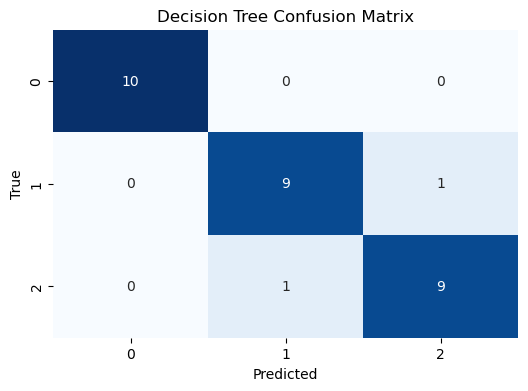

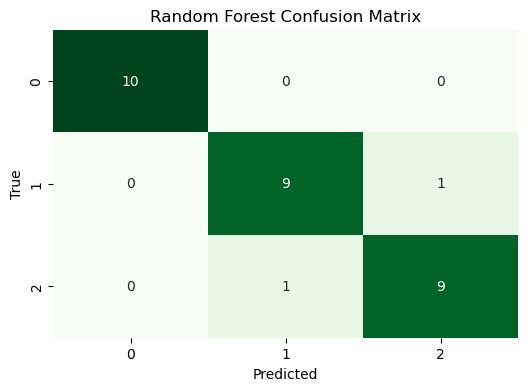

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris  # Load the iris dataset
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation metrics

# Load the Iris dataset
data = load_iris()  # Fetch the iris dataset from scikit-learn
X = pd.DataFrame(data.data, columns=data.feature_names)  # Create a DataFrame for the features
y = pd.Series(data.target)  # Create a Series for the target variable (species)

# Problem Statement: Predicting the species of iris flowers based on their features
# Data Preprocessing
print(f"Dataset shape: {X.shape}")  # Print the shape of the dataset (number of samples and features)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures that the split maintains the same distribution of classes in both sets

# Standardize the features for scaling
scaler = StandardScaler()  # Instantiate a StandardScaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit to the training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform the test data based on the training data's scaling

# ---- Model Training: Decision Tree ----
dt = DecisionTreeClassifier(random_state=42)  # Instantiate a Decision Tree Classifier
dt.fit(X_train_scaled, y_train)  # Train the model using the scaled training data
y_pred_dt = dt.predict(X_test_scaled)  # Make predictions on the scaled test data

# ---- Hyperparameter Tuning for Decision Tree ----
# Define a grid of hyperparameters to tune
param_grid_dt = {'max_depth': [None, 1, 8, 9], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5)  # Set up grid search with 5-fold cross-validation
grid_dt.fit(X_train_scaled, y_train)  # Fit the grid search to the training data
best_dt = grid_dt.best_estimator_  # Get the best model from grid search

# Evaluate Decision Tree
y_pred_dt_best = best_dt.predict(X_test_scaled)  # Make predictions using the best Decision Tree
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_best):.4f}")  # Print accuracy of the Decision Tree
print(classification_report(y_test, y_pred_dt_best))  # Print detailed classification report, including precision, recall, and F1 score

# ---- Model Training: Random Forest ----
rf = RandomForestClassifier(random_state=42)  # Instantiate a Random Forest Classifier
rf.fit(X_train_scaled, y_train)  # Train the model using the scaled training data
y_pred_rf = rf.predict(X_test_scaled)  # Make predictions on the scaled test data

# ---- Hyperparameter Tuning for Random Forest ----
# Define a grid of hyperparameters to tune
param_grid_rf = {'n_estimators': [90, 180, 270], 'max_depth': [None, 2, 4, 6]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)  # Set up grid search with 5-fold cross-validation
grid_rf.fit(X_train_scaled, y_train)  # Fit the grid search to the training data
best_rf = grid_rf.best_estimator_  # Get the best model from grid search

# Evaluate Random Forest
y_pred_rf_best = best_rf.predict(X_test_scaled)  # Make predictions using the best Random Forest
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_best):.4f}")  # Print accuracy of the Random Forest
print(classification_report(y_test, y_pred_rf_best))  # Print detailed classification report

# ---- Comparative Analysis ----
print("\nModel Comparison:")
print(f"Best Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt_best):.4f}")  # Compare accuracies of both models
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_best):.4f}")  # Compare accuracies

# Confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt_best)  # Generate confusion matrix for Decision Tree
plt.figure(figsize=(6, 4))  # Set the figure size for the plot
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)  # Plot confusion matrix
plt.title("Decision Tree Confusion Matrix")  # Title of the plot
plt.xlabel("Predicted")  # X-axis label (Predicted class)
plt.ylabel("True")  # Y-axis label (True class)
plt.show()  # Display the plot
# The confusion matrix shows the counts of true positive, false positive, true negative, and false negative predictions.

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_best)  # Generate confusion matrix for Random Forest
plt.figure(figsize=(6, 4))  # Set the figure size for the plot
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False)  # Plot confusion matrix
plt.title("Random Forest Confusion Matrix")  # Title of the plot
plt.xlabel("Predicted")  # X-axis label (Predicted class)
plt.ylabel("True")  # Y-axis label (True class)
plt.show()  # Display the plot
# The confusion matrix helps visualize how many predictions were correctly and incorrectly classified by the model.